In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/symptom2disease/Symptom2Disease.csv


# DISEASE CLASSIFICATION USING SYMPTOMS

![](https://c8.alamy.com/comp/R6NPE0/disease-word-cloud-design-R6NPE0.jpg)

# Importing Libraries

In this section, necessary libraries are imported to perform various tasks such as data manipulation, text preprocessing, machine learning, and visualization.

In [2]:
# Importing libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Download nltk resources

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the Dataset


In [4]:
# Load the dataset

data = pd.read_csv('/kaggle/input/symptom2disease/Symptom2Disease.csv') 

##### About the Dataset

The dataset consists of 1200 datapoints and has two columns: "label" and "text".

label : contains the disease labels
text : contains the natural language symptom descriptions.

The dataset comprises 24 different diseases, and each disease has 50 symptom descriptions, resulting in a total of 1200 datapoints.

The following 24 diseases have been covered in the dataset:

Psoriasis, Varicose Veins, Typhoid, Chicken pox, Impetigo, Dengue, Fungal infection, Common Cold, Pneumonia, Dimorphic Hemorrhoids, Arthritis, Acne, Bronchial Asthma, Hypertension, Migraine, Cervical spondylosis, Jaundice, Malaria, Urinary tract infection, Allergy, Gastroesophageal reflux disease, Drug reaction, Peptic ulcer disease, Diabetes

# Understanding the data

In [5]:
# Displaying the dataset

data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [6]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
data

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [8]:
# Concise summary of DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [9]:
# Check for null values

data.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
# Display column names

data.columns

Index(['label', 'text'], dtype='object')

In [11]:
data.value_counts()

label                    text                                                                                                                                                                                                                                                
Jaundice                 I've been feeling extremely scratchy, sick, and worn out. In addition, I've lost weight and have a temperature. My urine is dark, and my skin has turned yellow. Additionally, I have been experiencing stomach pain.                                   4
Dimorphic Hemorrhoids    I've been constipated and it's really hard to go to the bathroom. When I do go, it hurts and my stool has been bloody. I've also been having some pain in my butt and my anus has been really itchy and irritated.                                      3
Arthritis                I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without 

In [12]:
# Extracting 'label' and 'text' columns from the 'data' DataFrame

labels = data['label']  # Contains the labels or categories associated with the text data
symptoms = data['text']  # Contains the textual data (e.g., symptoms, sentences) for analysis

# Text Preprocessing

Symptoms text is preprocessed, including tokenization, converting text to lowercase, and removing stopwords and non-alphabetic characters.

In [13]:
# Text Preprocessing

stop_words = set(stopwords.words('english'))

In [14]:
# Text Preprocessing Function

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [15]:
# Apply preprocessing to symptoms

preprocessed_symptoms = symptoms.apply(preprocess_text)


# Some Visualizations about the Data

## Word Cloud for symptoms:

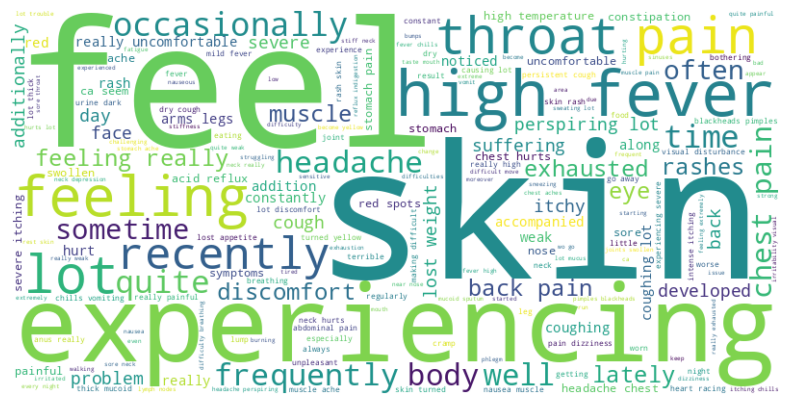

In [16]:

# Generate Word Cloud for symptoms
all_text = ' '.join(preprocessed_symptoms)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 ## Bar Chart for Disease Distribution:

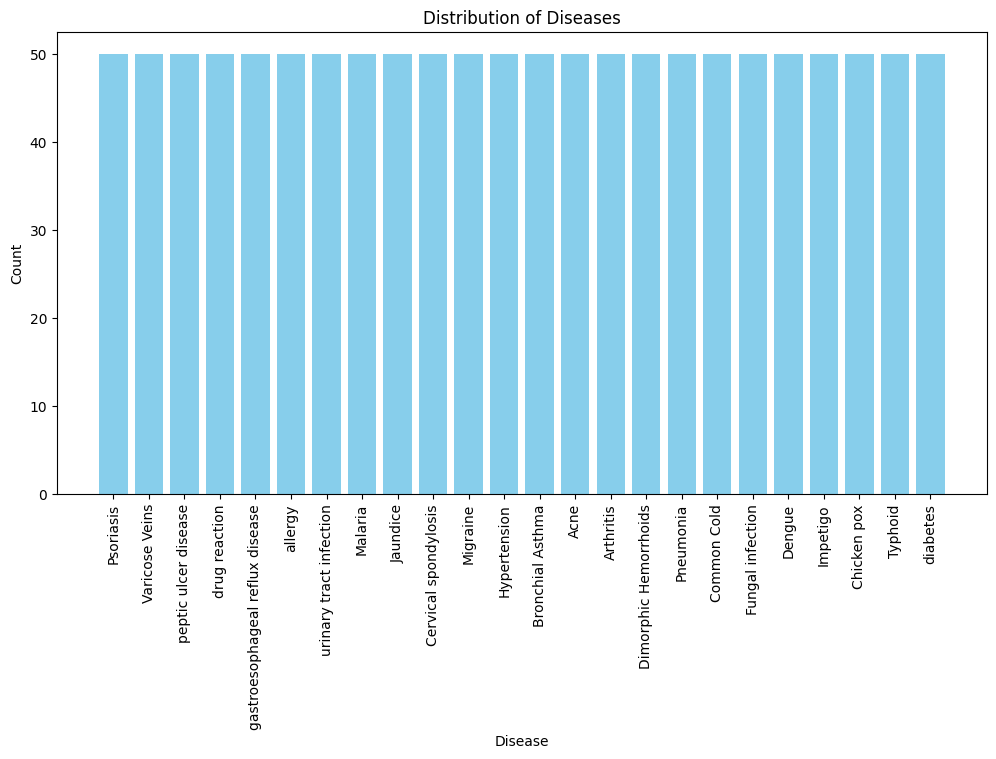

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = data['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

## Word Cloud for Common Symptoms:

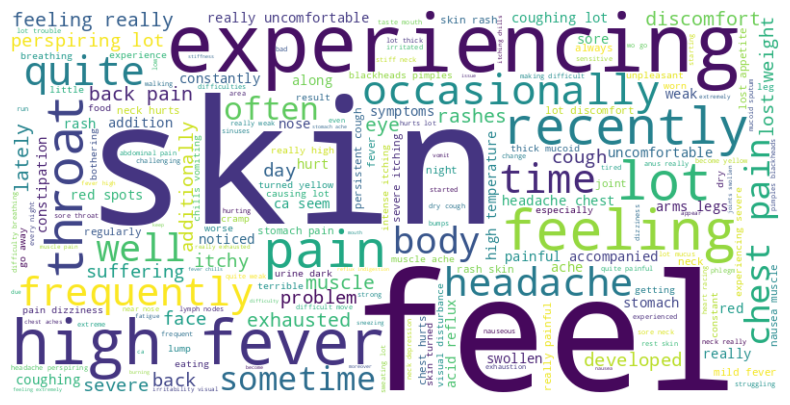

In [18]:
from wordcloud import WordCloud

# Combine all symptoms into a single string
all_text = ' '.join(preprocessed_symptoms)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Extraction using TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) vectors are generated from the preprocessed symptoms. This step converts text data into numerical features suitable for machine learning models.

In [19]:
# Feature Extraction using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # You can adjust max_features based on your dataset size
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

# Splitting Data

The dataset is split into training and testing sets, with 80% of the data used for training the model and 20% for testing its performance.

In [20]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

# KNN Model Training

A K-Nearest Neighbors (KNN) classifier is trained using the TF-IDF features and corresponding disease labels from the training set.

In [21]:
# KNN Model Training

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Making Predictions

The trained KNN classifier is used to predict disease labels for the test set symptoms.

In [22]:
# Predictions

predictions = knn_classifier.predict(X_test)

# Model Evaluation

The accuracy of the model is calculated using the predicted labels and compared with the actual labels. Additionally, a classification report is generated to provide detailed evaluation metrics.

In [23]:
# Model Evaluation

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.95
                                 precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.85      1.00      0.92        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.80      1.00      0.89        12
                    Common Cold       1.00      0.83      0.91        12
                         Dengue       0.92      0.92      0.92        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria    

# Confusion Matrix for Model Evaluation

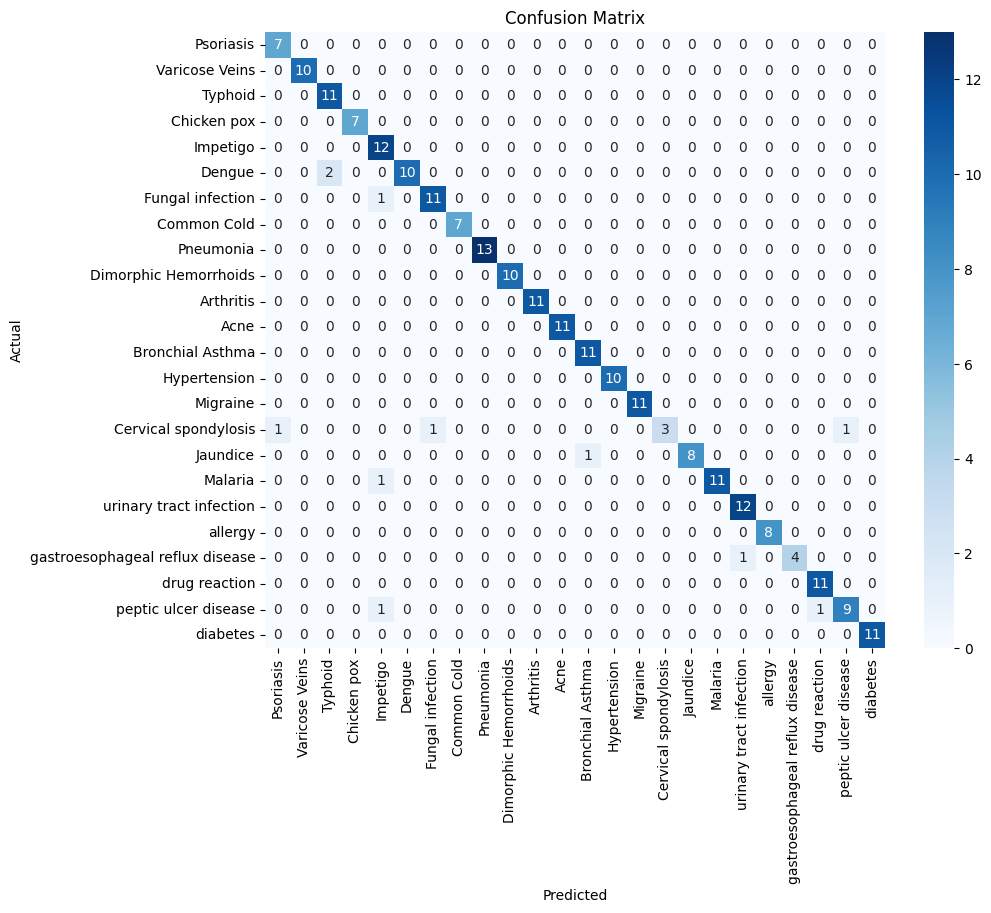

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Example Usage

In [25]:
# Example Usage
symptom = "Yellowing of skin and eyes, fatigue"

# Preprocess the input symptom
preprocessed_symptom = preprocess_text(symptom)

# Transform the preprocessed symptom using the same vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Predict the disease
predicted_disease = knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')


Predicted Disease: Jaundice
